In [27]:
%matplotlib inline
import pylab as pl

In [1]:
from spectral_cube import SpectralCube

In [11]:
from astropy import units as u

In [3]:
import os

In [6]:
os.chdir('/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/imaging_results/')

In [7]:
cube = SpectralCube.read('W51-E_B3_spw1_12M_lines.image.fits')

In [16]:
lines = cube.find_lines(chemical_name='Hα')

In [18]:
vcube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=lines[0]['Freq-GHz(rest frame,redshifted)']*u.GHz)

In [47]:
hacube[0,:5,:5]

<Slice [[ -5.61854695e-11, -8.71336336e-11, -1.13478719e-10,
          -1.30250630e-10, -1.33767067e-10],
        [  3.67146695e-11, -8.69964864e-12, -4.84104562e-11,
          -7.50113513e-11, -8.45596093e-11],
        [  8.66471547e-11,  7.67485311e-11,  6.33138403e-11,
           4.88062889e-11,  3.49425489e-11],
        [ -1.27009618e-11, -1.45975645e-11, -2.05058557e-11,
          -3.00222451e-11, -4.10440848e-11],
        [ -9.39964079e-12, -2.23006804e-11, -3.17426190e-11,
          -3.68412384e-11, -3.67390285e-11]] Jy / beam>

In [49]:
hacube_full = vcube.spectral_slab(0*u.km/u.s, 120*u.km/u.s)
hacube_full = hacube_full.with_mask((hacube_full > 1e-7*u.Jy/u.beam) | (hacube_full < -1e-7*u.Jy/u.beam))
hacube = hacube_full.minimal_subcube()

In [ ]:
hacube

In [30]:
m0 = hacube.moment0(axis=0, how='slice')

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/radio_beam-0.3.1-py3.6.egg/radio_beam/multiple_beams.py:258: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


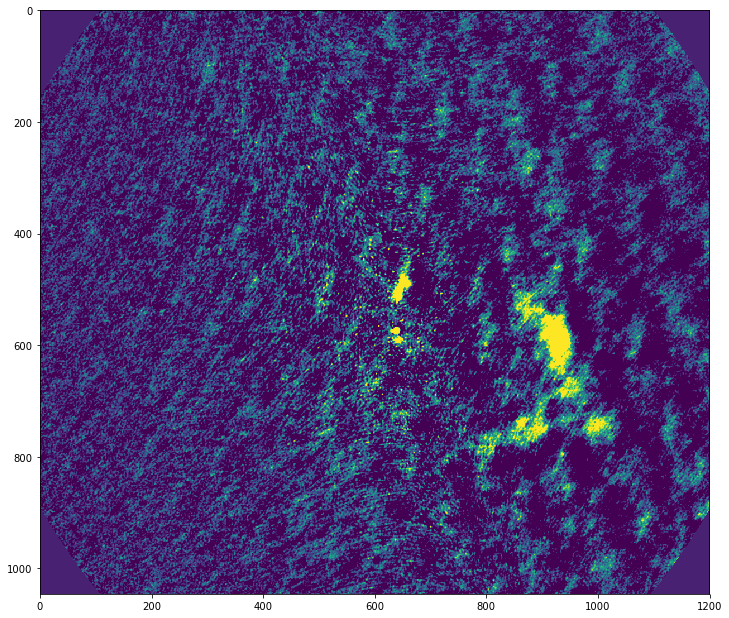

In [40]:
pl.figure(figsize=(12,12))
#pl.imshow(m0.value[800:-800,800:-800], vmin=-0.01, vmax=1)
pl.imshow(hacube[50,800:-800,800:-800].value, vmin=-0.001, vmax=0.01)

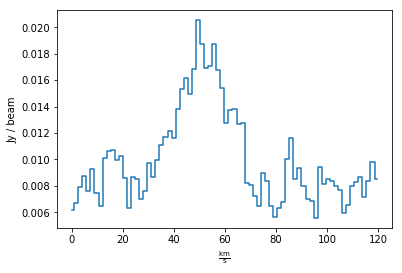

In [41]:
hacube[:,1400,1750].quicklook()

In [42]:
cont = hacube.percentile(10, axis=0)

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/radio_beam-0.3.1-py3.6.egg/radio_beam/multiple_beams.py:258: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


In [43]:
hacube.allow_huge_operations = True
hacsubcube = hacube - cont

ValueError: This function (<function BaseSpectralCube._apply_everywhere at 0x7ff468d039d8>) requires loading the entire cube into memory, and the cube is large (563068800 pixels), so by default we disable this operation. To enable the operation, set `cube.allow_huge_operations=True` and try again.